Example for "Single Output, Single Step" forecasting

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

### Create dummy dataset

In [10]:
N = 1000    # timestep
Tp = 800    # boundary between training and test

t = np.arange(0, N)
x = np.sin(0.02*t) + 2*np.random.rand(N)
df = pd.DataFrame(x, columns=['Data'])
df.head()

,Data
0,0.395588
1,1.312179
2,0.695615
3,1.675775
4,1.110234


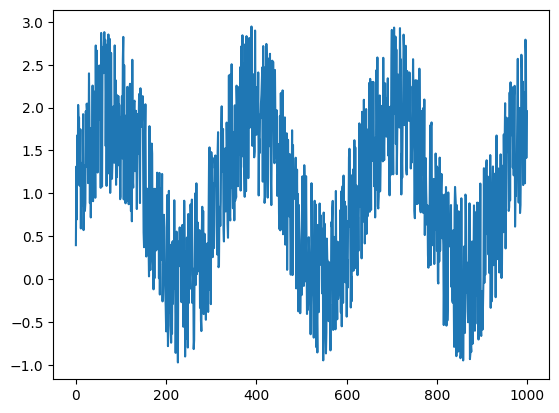

In [11]:
plt.plot(df)

### Split training and test set

split dataset into training and test part

In [12]:
train = df.iloc[:800]
train

,Data
0,0.395588
1,1.312179
2,0.695615
3,1.675775
4,1.110234
...,...
795,0.824369
796,0.575434
797,1.463940
798,1.159404


In [13]:
test = df.iloc[800:]
test

,Data
800,0.329207
801,1.300384
802,-0.023756
803,-0.051725
804,1.202431
...,...
995,1.117019
996,2.791794
997,2.620302
998,1.412982


## Method 1 - Manually create input and output matrix

### Split input and output matrix in test set `X_test` and `y_test`

construct input batches based on (time)step

In [14]:
test.to_numpy()

array([[ 0.32920688],
       [ 1.30038423],
       [-0.02375632],
       [-0.05172486],
       [ 1.20243086],
       [ 0.20492676],
       [ 1.41667331],
       [ 0.33066689],
       [ 0.72331542],
       [ 1.01512579],
       [ 1.22619469],
       [ 0.47640871],
       [ 0.98247172],
       [ 0.59348675],
       [ 0.39728472],
       [-0.53618778],
       [-0.00447188],
       [ 0.98540099],
       [-0.39080235],
       [ 0.10786862],
       [ 1.07371171],
       [-0.5431434 ],
       [ 0.28141385],
       [-0.48475279],
       [-0.28527391],
       [ 1.0102071 ],
       [ 0.53612284],
       [ 0.38060736],
       [ 0.60780397],
       [ 0.70390843],
       [ 0.52285483],
       [ 0.86353012],
       [-0.09218341],
       [ 0.45344116],
       [-0.25237986],
       [-0.27588636],
       [ 0.5691253 ],
       [-0.17386064],
       [-0.7908707 ],
       [ 0.79935477],
       [ 1.07447512],
       [ 0.96925637],
       [ 0.84753625],
       [-0.89898419],
       [ 0.86277127],
       [ 0

In [15]:
dummy = test.to_numpy()
dummy.shape

(200, 1)

In [16]:
dummy2 = dummy.flatten()
dummy2.shape

(200,)

In [17]:
step = 4
test_array = test.to_numpy()
# test_array = np.append(test_array, np.repeat(test_array[-1,], step))
test_array = test_array.flatten()
test_array

array([ 0.32920688,  1.30038423, -0.02375632, -0.05172486,  1.20243086,
        0.20492676,  1.41667331,  0.33066689,  0.72331542,  1.01512579,
        1.22619469,  0.47640871,  0.98247172,  0.59348675,  0.39728472,
       -0.53618778, -0.00447188,  0.98540099, -0.39080235,  0.10786862,
        1.07371171, -0.5431434 ,  0.28141385, -0.48475279, -0.28527391,
        1.0102071 ,  0.53612284,  0.38060736,  0.60780397,  0.70390843,
        0.52285483,  0.86353012, -0.09218341,  0.45344116, -0.25237986,
       -0.27588636,  0.5691253 , -0.17386064, -0.7908707 ,  0.79935477,
        1.07447512,  0.96925637,  0.84753625, -0.89898419,  0.86277127,
        0.27308388,  0.56647797, -0.84487857,  0.7903999 ,  0.05978208,
        0.48765289, -0.20716077, -0.92282777, -0.88353735,  0.94213998,
       -0.44819073, -0.73766626, -0.03066017, -0.94893402, -0.38572923,
        0.37974145, -0.126993  , -0.62805025,  0.98526219,  0.96454873,
        0.29721939, -0.16249207, -0.10996595, -0.37352011, -0.50

In [18]:
len(test_array)

200

In [19]:
X, Y = [], []
for i in range(len(test_array) - step):
  d = i + step
  X.append(test_array[i:d,])
  Y.append(test_array[d,])

In [20]:
X_test = np.array(X)
X_test

array([[ 0.32920688,  1.30038423, -0.02375632, -0.05172486],
       [ 1.30038423, -0.02375632, -0.05172486,  1.20243086],
       [-0.02375632, -0.05172486,  1.20243086,  0.20492676],
       [-0.05172486,  1.20243086,  0.20492676,  1.41667331],
       [ 1.20243086,  0.20492676,  1.41667331,  0.33066689],
       [ 0.20492676,  1.41667331,  0.33066689,  0.72331542],
       [ 1.41667331,  0.33066689,  0.72331542,  1.01512579],
       [ 0.33066689,  0.72331542,  1.01512579,  1.22619469],
       [ 0.72331542,  1.01512579,  1.22619469,  0.47640871],
       [ 1.01512579,  1.22619469,  0.47640871,  0.98247172],
       [ 1.22619469,  0.47640871,  0.98247172,  0.59348675],
       [ 0.47640871,  0.98247172,  0.59348675,  0.39728472],
       [ 0.98247172,  0.59348675,  0.39728472, -0.53618778],
       [ 0.59348675,  0.39728472, -0.53618778, -0.00447188],
       [ 0.39728472, -0.53618778, -0.00447188,  0.98540099],
       [-0.53618778, -0.00447188,  0.98540099, -0.39080235],
       [-0.00447188,  0.

In [21]:
y_test = np.array(Y)
y_test

array([ 1.20243086,  0.20492676,  1.41667331,  0.33066689,  0.72331542,
        1.01512579,  1.22619469,  0.47640871,  0.98247172,  0.59348675,
        0.39728472, -0.53618778, -0.00447188,  0.98540099, -0.39080235,
        0.10786862,  1.07371171, -0.5431434 ,  0.28141385, -0.48475279,
       -0.28527391,  1.0102071 ,  0.53612284,  0.38060736,  0.60780397,
        0.70390843,  0.52285483,  0.86353012, -0.09218341,  0.45344116,
       -0.25237986, -0.27588636,  0.5691253 , -0.17386064, -0.7908707 ,
        0.79935477,  1.07447512,  0.96925637,  0.84753625, -0.89898419,
        0.86277127,  0.27308388,  0.56647797, -0.84487857,  0.7903999 ,
        0.05978208,  0.48765289, -0.20716077, -0.92282777, -0.88353735,
        0.94213998, -0.44819073, -0.73766626, -0.03066017, -0.94893402,
       -0.38572923,  0.37974145, -0.126993  , -0.62805025,  0.98526219,
        0.96454873,  0.29721939, -0.16249207, -0.10996595, -0.37352011,
       -0.50377159,  0.19914732, -0.41582988,  0.88323382, -0.93

### Split input and output matrix in test set `X_train` and `y_train`

similarly, we can construct training dataset

In [22]:
train_array = train.to_numpy()
# test_array = np.append(test_array, np.repeat(test_array[-1,], step))
train_array = train_array.flatten()
train_array

array([ 3.95587517e-01,  1.31217930e+00,  6.95615285e-01,  1.67577472e+00,
        1.11023446e+00,  2.03057732e+00,  1.81918992e+00,  1.88274571e+00,
        1.09041232e+00,  1.43517111e+00,  1.74635923e+00,  5.90086107e-01,
        1.29739435e+00,  1.01194888e+00,  1.35597252e+00,  8.52643816e-01,
        1.92318223e+00,  5.70954850e-01,  1.32308523e+00,  9.72587320e-01,
        7.94049824e-01,  8.86897677e-01,  1.95814893e+00,  1.30628585e+00,
        2.04512922e+00,  1.95095887e+00,  2.04488055e+00,  1.11888237e+00,
        1.44182765e+00,  2.39861883e+00,  1.87270746e+00,  8.85399895e-01,
        1.75874829e+00,  7.18456580e-01,  1.41190971e+00,  1.35670872e+00,
        1.30218582e+00,  2.25647943e+00,  9.08012363e-01,  2.19196180e+00,
        2.17666021e+00,  1.97513079e+00,  1.72731320e+00,  9.48054986e-01,
        2.72391012e+00,  1.71133129e+00,  2.66549078e+00,  2.19023040e+00,
        1.24228454e+00,  2.24903194e+00,  2.06601291e+00,  2.27284209e+00,
        2.49052566e+00,  

In [23]:
X, Y = [], []
for i in range(len(train_array) - step):
  d = i + step
  X.append(train_array[i:d,])
  Y.append(train_array[d,])

In [24]:
X_train = np.array(X)
X_train[-2]

array([0.1755139 , 0.82436889, 0.57543372, 1.46394033])

In [25]:
y_train = np.array(Y)
y_train[-2]

1.1594043557174736

### Reshape input suitable for Keras RNN model *(batch_size, timestep, feature)*

In [26]:
X_train.shape

(796, 4)

In [27]:
y_train.shape

(796,)

In [28]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(796, 4, 1)

In [29]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(196, 4, 1)

### Create a model with SimpleRNN

In [30]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(step, 1), activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1))

In [31]:
import tensorflow as tf

model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1361 (5.32 KB)
Trainable params: 1361 (5.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
50/50 [==============================] - 0s 724us/step - loss: 1.0575 - root_mean_squared_error: 1.0284
Epoch 2/100
50/50 [==============================] - 0s 638us/step - loss: 0.4056 - root_mean_squared_error: 0.6369
Epoch 3/100
50/50 [==============================] - 0s 562us/step - loss: 0.4009 - root_mean_squared_error: 0.6332
Epoch 4/100
50/50 [==============================] - 0s 595us/step - loss: 0.3995 - root_mean_squared_error: 0.6320
Epoch 5/100
50/50 [==============================] - 0s 639us/step - loss: 0.3930 - root_mean_squared_error: 0.6269
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3948 - root_mean_squared_error: 0.6283
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: 0.3930 - root_mean_squared_error: 0.6269
Epoch 8/100
50/50 [==============================] - 0s 743us/step - loss: 0.3890 - root_mean_squared_error: 0.6237
Epoch 9/100
50/50 [==============================] - 0s 680us/step - loss: 0

### Predict and display result

Use the trained model to predict output using X_train and X_test data span

In [34]:
predicted_train = model.predict(X_train)
predicted_test = model.predict(X_test)

7/7 [==============================] - 0s 1ms/step


Display predicted train as Pandas dataframe

In [35]:
predicted_train = pd.DataFrame(predicted_train)
predicted_train

,0
0,1.010643
1,1.380418
2,1.271542
3,1.639449
4,1.683660
...,...
791,0.936648
792,0.604419
793,0.745357
794,0.846053


Compare with `train` dataframe

In [36]:
train

,Data
0,0.395588
1,1.312179
2,0.695615
3,1.675775
4,1.110234
...,...
795,0.824369
796,0.575434
797,1.463940
798,1.159404


Reindex result to match index in initial data with `N` rows. Therefore we need to update index by `step` rows and reindex to `N` rows.

In [37]:
predicted_train.index = predicted_train.index + step
predicted_train = predicted_train.reindex(np.arange(N+1))
predicted_train

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,1.010643
...,...
996,NaN
997,NaN
998,NaN
999,NaN


Create `result` dataframe that store initial data and predictions of X_train

In [38]:
result = df.copy()
result['Predicted (Train)'] = predicted_train
result

,Data,Predicted (Train)
0,0.395588,NaN
1,1.312179,NaN
2,0.695615,NaN
3,1.675775,NaN
4,1.110234,1.010643
...,...,...
995,1.117019,NaN
996,2.791794,NaN
997,2.620302,NaN
998,1.412982,NaN


Display result

<Axes: >

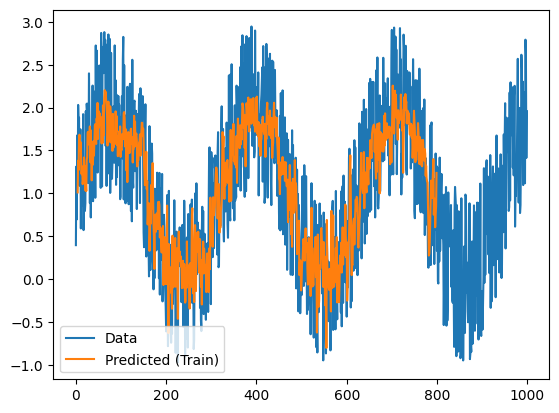

In [39]:
result.plot()

Display predicted test as Pandas dataframe

In [40]:
predicted_test = pd.DataFrame(predicted_test, columns=['Predicted (Test)'])
predicted_test

,Predicted (Test)
0,0.132655
1,0.496910
2,0.512401
3,0.848623
4,0.828240
...,...
191,1.495935
192,1.670235
193,1.538597
194,1.637647


Compare with test set

In [41]:
test

,Data
800,0.329207
801,1.300384
802,-0.023756
803,-0.051725
804,1.202431
...,...
995,1.117019
996,2.791794
997,2.620302
998,1.412982


Reindex result to match index in initial data with `N` rows. Therefore we need to update index by `step` and `Tp` rows and reindex to `N` rows.

In [42]:
predicted_test.index = predicted_test.index + Tp + step
predicted_test = predicted_test.reindex(np.arange(max(predicted_test.index)+1))
predicted_test

,Predicted (Test)
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
995,1.495935
996,1.670235
997,1.538597
998,1.637647


Add the prediction of X_test in `result` dataframe that store initial data and prediction of X_train

In [43]:
result['Predicted (Test)'] = predicted_test
result

,Data,Predicted (Train),Predicted (Test)
0,0.395588,NaN,NaN
1,1.312179,NaN,NaN
2,0.695615,NaN,NaN
3,1.675775,NaN,NaN
4,1.110234,1.010643,NaN
...,...,...,...
995,1.117019,NaN,1.495935
996,2.791794,NaN,1.670235
997,2.620302,NaN,1.538597
998,1.412982,NaN,1.637647


Plot result

<Axes: >

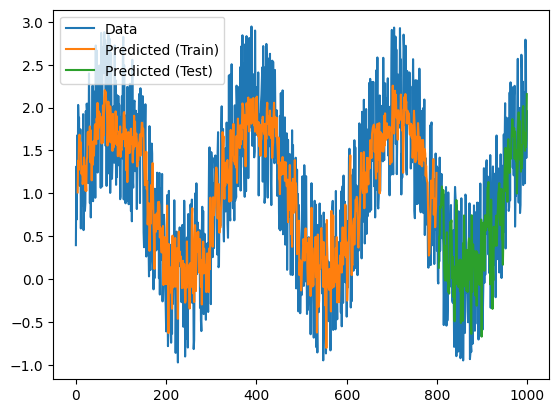

In [44]:
result.plot()

### Evaluate model

In [45]:
model.evaluate(X_train, y_train)

25/25 [==============================] - 0s 714us/step - loss: 0.3204 - root_mean_squared_error: 0.5661


[0.3204498291015625, 0.5660828948020935]

In [46]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.4506 - root_mean_squared_error: 0.6712


[0.45056644082069397, 0.6712424755096436]

In [47]:
from sklearn.metrics import r2_score

r2_score(y_train, model.predict(X_train))

25/25 [==============================] - 0s 411us/step


0.6071349975628968

In [48]:
r2_score(y_test, model.predict(X_test))

7/7 [==============================] - 0s 638us/step


0.4004722141734466

## Method 2 - Use Time Series Generator in keras to build input output

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [49]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [50]:
length = 4
batch_size = 1
train_generator = TimeseriesGenerator(train.to_numpy(), train.to_numpy(), length=length, batch_size=batch_size)

In [51]:
len(train)

800

In [52]:
len(train_generator)

796

In [53]:
for i in range(len(train_generator)):
  X, y = train_generator[i]
  print(i, ': ',X.flatten(), '==>', y.flatten())

0 :  [0.39558752 1.3121793  0.69561529 1.67577472] ==> [1.11023446]
1 :  [1.3121793  0.69561529 1.67577472 1.11023446] ==> [2.03057732]
2 :  [0.69561529 1.67577472 1.11023446 2.03057732] ==> [1.81918992]
3 :  [1.67577472 1.11023446 2.03057732 1.81918992] ==> [1.88274571]
4 :  [1.11023446 2.03057732 1.81918992 1.88274571] ==> [1.09041232]
5 :  [2.03057732 1.81918992 1.88274571 1.09041232] ==> [1.43517111]
6 :  [1.81918992 1.88274571 1.09041232 1.43517111] ==> [1.74635923]
7 :  [1.88274571 1.09041232 1.43517111 1.74635923] ==> [0.59008611]
8 :  [1.09041232 1.43517111 1.74635923 0.59008611] ==> [1.29739435]
9 :  [1.43517111 1.74635923 0.59008611 1.29739435] ==> [1.01194888]
10 :  [1.74635923 0.59008611 1.29739435 1.01194888] ==> [1.35597252]
11 :  [0.59008611 1.29739435 1.01194888 1.35597252] ==> [0.85264382]
12 :  [1.29739435 1.01194888 1.35597252 0.85264382] ==> [1.92318223]
13 :  [1.01194888 1.35597252 0.85264382 1.92318223] ==> [0.57095485]
14 :  [1.35597252 0.85264382 1.92318223 0.57

In [54]:
test_generator = TimeseriesGenerator(test.to_numpy(), test.to_numpy(), length=length, batch_size=batch_size)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
import tensorflow as tf

In [56]:
train.shape

(800, 1)

In [57]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(length, train.shape[1])))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1361 (5.32 KB)
Trainable params: 1361 (5.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
history = model.fit(train_generator,
          epochs=100,
          validation_data=test_generator)

Epoch 1/100
796/796 [==============================] - 1s 788us/step - loss: 0.4231 - root_mean_squared_error: 0.6505 - val_loss: 0.4363 - val_root_mean_squared_error: 0.6605
Epoch 2/100
796/796 [==============================] - 1s 623us/step - loss: 0.4121 - root_mean_squared_error: 0.6420 - val_loss: 0.4638 - val_root_mean_squared_error: 0.6810
Epoch 3/100
796/796 [==============================] - 0s 619us/step - loss: 0.4067 - root_mean_squared_error: 0.6377 - val_loss: 0.4320 - val_root_mean_squared_error: 0.6573
Epoch 4/100
796/796 [==============================] - 1s 622us/step - loss: 0.4048 - root_mean_squared_error: 0.6362 - val_loss: 0.4979 - val_root_mean_squared_error: 0.7056
Epoch 5/100
796/796 [==============================] - 1s 622us/step - loss: 0.4048 - root_mean_squared_error: 0.6363 - val_loss: 0.4404 - val_root_mean_squared_error: 0.6636
Epoch 6/100
796/796 [==============================] - 0s 617us/step - loss: 0.4027 - root_mean_squared_error: 0.6346 - val_l

<Axes: >

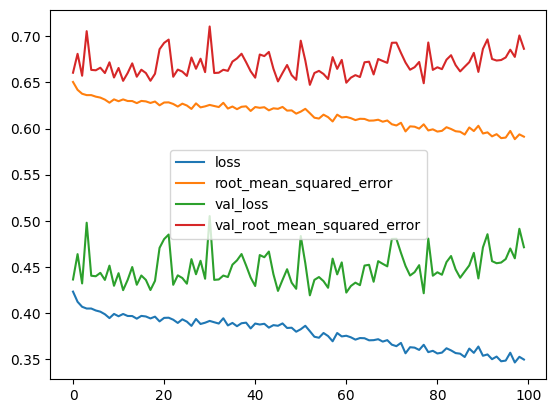

In [60]:
losses = pd.DataFrame(model.history.history)
losses.plot()